In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Using TensorFlow backend.


In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(10, 10)

In [3]:
# Dataset de treino e teste
df_treino = pd.read_csv('train.csv') 
df_teste = pd.read_csv('test.csv')

In [4]:
df_treino = df_treino.drop(columns="Unnamed: 0")

In [5]:
df_treino.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [6]:
df_teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [7]:
features = list(df_teste.columns)
features.append('IN_TREINEIRO')
df_treino = df_treino[features]

In [8]:
treino_nu_insc = df_treino['NU_INSCRICAO']
teste_nu_insc = df_teste['NU_INSCRICAO']

df_treino.drop('NU_INSCRICAO', 1, inplace = True)
df_teste.drop('NU_INSCRICAO', 1, inplace = True)

In [9]:
treineiro = df_treino['IN_TREINEIRO']
df_treino.drop('IN_TREINEIRO',1,inplace=True)

dummies = pd.get_dummies(df_treino.append(df_teste))

df_lenght = len(df_treino)

df_treino = dummies.iloc[:df_lenght]
df_teste = dummies.iloc[df_lenght:]

df_treino['IN_TREINEIRO'] = treineiro

/home/douglas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
for x in df_treino.columns:
    print(x)

CO_UF_RESIDENCIA
NU_IDADE
TP_COR_RACA
TP_NACIONALIDADE
TP_ST_CONCLUSAO
TP_ANO_CONCLUIU
TP_ESCOLA
TP_ENSINO
TP_DEPENDENCIA_ADM_ESC
IN_BAIXA_VISAO
IN_CEGUEIRA
IN_SURDEZ
IN_DISLEXIA
IN_DISCALCULIA
IN_SABATISTA
IN_GESTANTE
IN_IDOSO
TP_PRESENCA_CN
TP_PRESENCA_CH
TP_PRESENCA_LC
TP_PRESENCA_MT
NU_NOTA_CN
NU_NOTA_CH
NU_NOTA_LC
TP_LINGUA
TP_STATUS_REDACAO
NU_NOTA_COMP1
NU_NOTA_COMP2
NU_NOTA_COMP3
NU_NOTA_COMP4
NU_NOTA_COMP5
NU_NOTA_REDACAO
SG_UF_RESIDENCIA_AC
SG_UF_RESIDENCIA_AL
SG_UF_RESIDENCIA_AM
SG_UF_RESIDENCIA_AP
SG_UF_RESIDENCIA_BA
SG_UF_RESIDENCIA_CE
SG_UF_RESIDENCIA_DF
SG_UF_RESIDENCIA_ES
SG_UF_RESIDENCIA_GO
SG_UF_RESIDENCIA_MA
SG_UF_RESIDENCIA_MG
SG_UF_RESIDENCIA_MS
SG_UF_RESIDENCIA_MT
SG_UF_RESIDENCIA_PA
SG_UF_RESIDENCIA_PB
SG_UF_RESIDENCIA_PE
SG_UF_RESIDENCIA_PI
SG_UF_RESIDENCIA_PR
SG_UF_RESIDENCIA_RJ
SG_UF_RESIDENCIA_RN
SG_UF_RESIDENCIA_RO
SG_UF_RESIDENCIA_RR
SG_UF_RESIDENCIA_RS
SG_UF_RESIDENCIA_SC
SG_UF_RESIDENCIA_SE
SG_UF_RESIDENCIA_SP
SG_UF_RESIDENCIA_TO
TP_SEXO_F
TP_SEXO_M
Q001_

In [11]:
for x in df_teste.columns:
    print(x)

CO_UF_RESIDENCIA
NU_IDADE
TP_COR_RACA
TP_NACIONALIDADE
TP_ST_CONCLUSAO
TP_ANO_CONCLUIU
TP_ESCOLA
TP_ENSINO
TP_DEPENDENCIA_ADM_ESC
IN_BAIXA_VISAO
IN_CEGUEIRA
IN_SURDEZ
IN_DISLEXIA
IN_DISCALCULIA
IN_SABATISTA
IN_GESTANTE
IN_IDOSO
TP_PRESENCA_CN
TP_PRESENCA_CH
TP_PRESENCA_LC
TP_PRESENCA_MT
NU_NOTA_CN
NU_NOTA_CH
NU_NOTA_LC
TP_LINGUA
TP_STATUS_REDACAO
NU_NOTA_COMP1
NU_NOTA_COMP2
NU_NOTA_COMP3
NU_NOTA_COMP4
NU_NOTA_COMP5
NU_NOTA_REDACAO
SG_UF_RESIDENCIA_AC
SG_UF_RESIDENCIA_AL
SG_UF_RESIDENCIA_AM
SG_UF_RESIDENCIA_AP
SG_UF_RESIDENCIA_BA
SG_UF_RESIDENCIA_CE
SG_UF_RESIDENCIA_DF
SG_UF_RESIDENCIA_ES
SG_UF_RESIDENCIA_GO
SG_UF_RESIDENCIA_MA
SG_UF_RESIDENCIA_MG
SG_UF_RESIDENCIA_MS
SG_UF_RESIDENCIA_MT
SG_UF_RESIDENCIA_PA
SG_UF_RESIDENCIA_PB
SG_UF_RESIDENCIA_PE
SG_UF_RESIDENCIA_PI
SG_UF_RESIDENCIA_PR
SG_UF_RESIDENCIA_RJ
SG_UF_RESIDENCIA_RN
SG_UF_RESIDENCIA_RO
SG_UF_RESIDENCIA_RR
SG_UF_RESIDENCIA_RS
SG_UF_RESIDENCIA_SC
SG_UF_RESIDENCIA_SE
SG_UF_RESIDENCIA_SP
SG_UF_RESIDENCIA_TO
TP_SEXO_F
TP_SEXO_M
Q001_

In [12]:
df_treino.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,Q027_J,Q027_K,Q027_L,Q027_M,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E,IN_TREINEIRO
0,43,24,1,1,1,4,1,NaN,NaN,0,...,0,0,0,0,1,0,0,0,0,0
1,23,17,3,1,2,0,2,1.0,2.0,0,...,0,0,0,0,1,0,0,0,0,0
2,23,21,3,1,3,0,1,NaN,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,33,25,0,1,1,9,1,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,0
4,13,28,2,1,1,4,1,NaN,NaN,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
df_teste.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,Q027_I,Q027_J,Q027_K,Q027_L,Q027_M,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,43,19,1,1,1,3,1,NaN,NaN,0,...,0,0,0,0,0,1,0,0,0,0
1,15,24,3,2,1,4,1,NaN,NaN,0,...,0,0,0,0,0,1,0,0,0,0
2,29,16,2,1,3,0,1,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
3,41,17,1,1,2,0,2,1.0,2.0,0,...,0,0,0,0,0,1,0,0,0,0
4,53,19,1,1,1,1,1,NaN,NaN,0,...,0,0,0,0,0,1,0,0,0,0


# Tratando dados faltantes

In [14]:
# tabela percentual de dados faltantes
total = df_treino.isnull().sum().sort_values(ascending=False)
percentual = (df_treino.isnull().sum()/df_treino.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([total, percentual], axis=1,join='outer', keys=['Dados Ausentes', '% Percentual'])
missing_data.index.name =' Variaveis numericas'
missing_data

,Dados Ausentes,% Percentual
Variaveis numericas,,
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
TP_ENSINO,9448,0.688128
NU_NOTA_COMP3,3597,0.261981
NU_NOTA_LC,3597,0.261981
TP_STATUS_REDACAO,3597,0.261981
...,...,...
Q006_J,0,0.000000
Q006_K,0,0.000000
Q006_L,0,0.000000


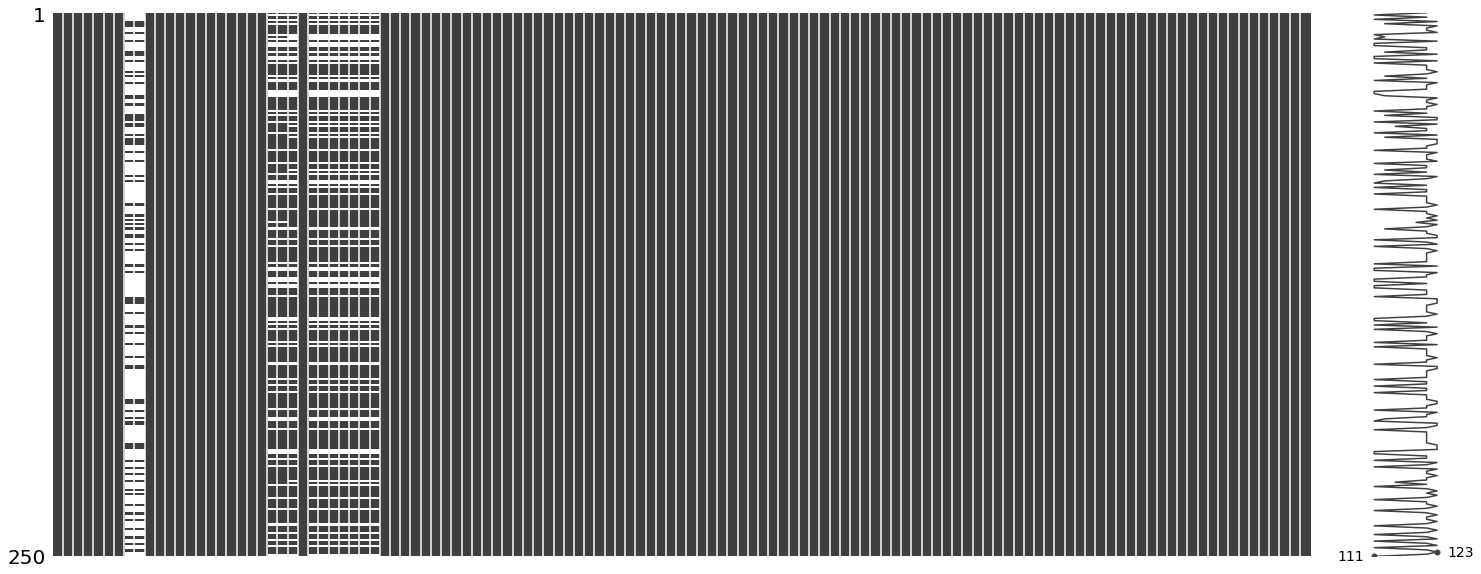

In [15]:
msno.matrix(df_treino.sample(250))

In [16]:
#preenchendo os valores faltantes com zero 
df_treino = df_treino.fillna(0)
df_teste = df_teste.fillna(0)

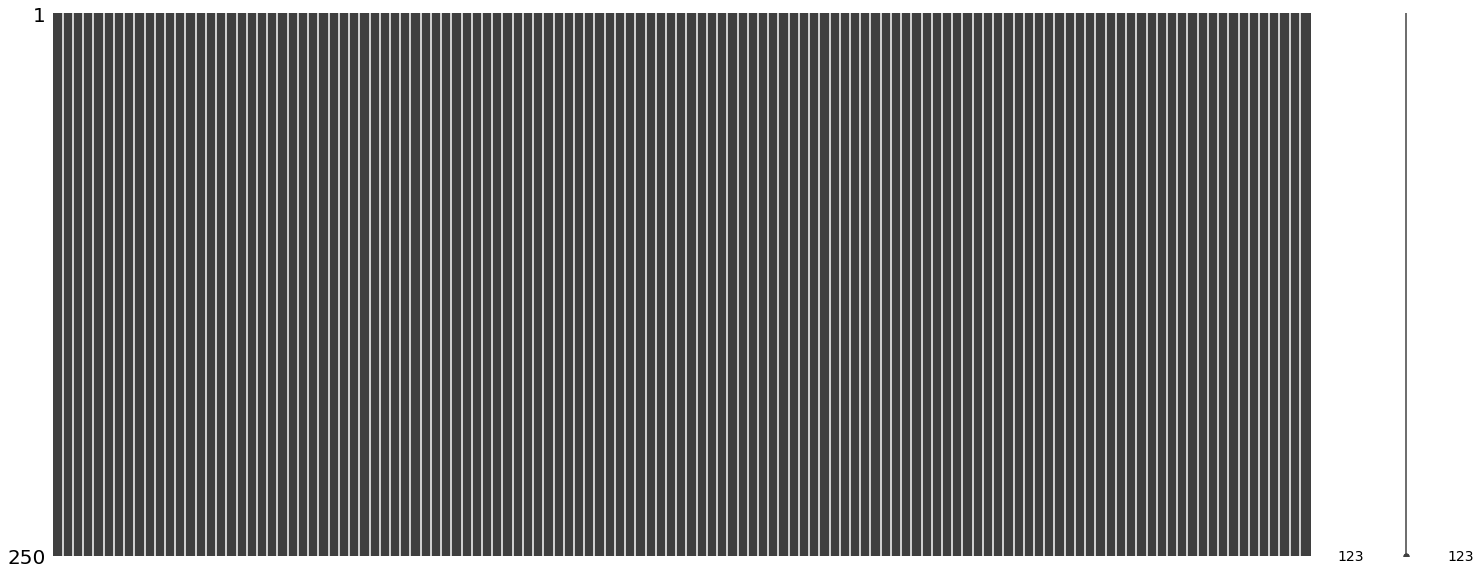

In [17]:
msno.matrix(df_treino.sample(250))

## Nosso Target

In [18]:
df_treino.IN_TREINEIRO.value_counts() # 0 - FALSE: Alunos que Não fizeram o enem e 1 - TRUE: fizeram o enem

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

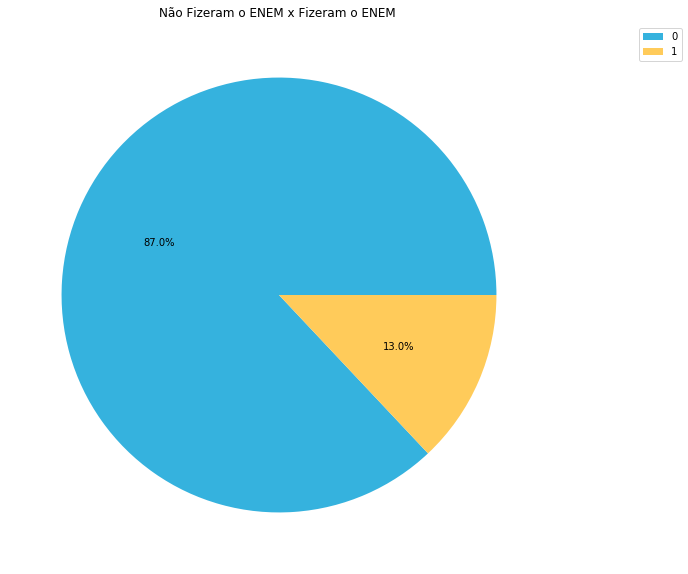

In [19]:
colors = ['#35b2de','#ffcb5a'] # Apenas escolhando as cores

labels = df_treino.IN_TREINEIRO.value_counts().index
plt.pie(df_treino.IN_TREINEIRO.value_counts(),autopct = '%1.1f%%', colors = colors) # ocorrências de cada classe e a porcentagem
plt.legend(labels,bbox_to_anchor = (1.25,1),) # Nossas Legendas
plt.title('Não Fizeram o ENEM x Fizeram o ENEM ')
plt.show()

### Aplicando o SMOTE (Synthetic Minority Over-sampling Technique)
> Gera dados sintéticos da classe minoritária.

In [20]:
X = df_treino.drop("IN_TREINEIRO", axis= 1)
y = df_treino.IN_TREINEIRO
print(f'Antes de balancear os dados: {np.bincount(y)}')

Antes de balancear os dados: [11947  1783]


In [21]:
smt = SMOTE()

X, y = smt.fit_sample(X, y)
print(f'Depois de balancear os dados: {np.bincount(y)}')

Depois de balancear os dados: [11947 11947]


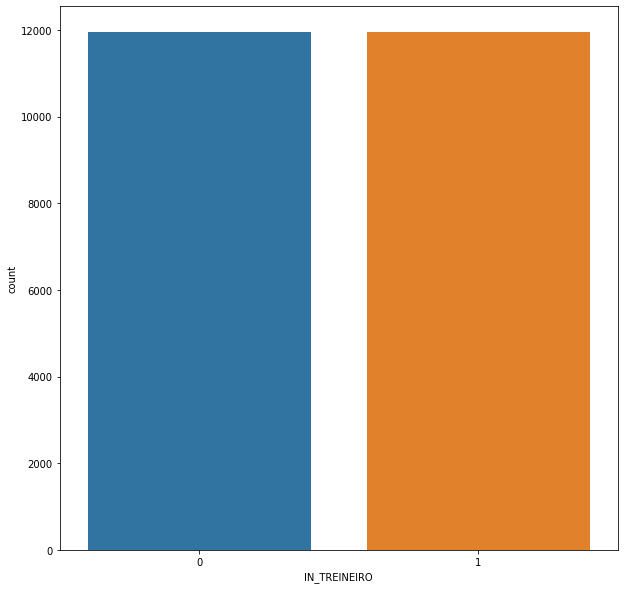

In [22]:
ax = sns.countplot(x=y)

### Separando Treino e Teste

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Random Forest

In [24]:
random_forest = RandomForestClassifier(n_estimators=500)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [25]:
print(f'Acuracia: {accuracy_score(y_test, y_pred)}')

Acuracia: 0.9983260096254446


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2371
           1       1.00      1.00      1.00      2408

    accuracy                           1.00      4779
   macro avg       1.00      1.00      1.00      4779
weighted avg       1.00      1.00      1.00      4779



In [28]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        2370     1  2371
1           7  2401  2408
All      2377  2402  4779


#### Criando dataset de resposta

In [29]:
random_forest.fit(X_train, y_train)
pred = random_forest.predict(df_teste)

In [37]:
pred_treineiro = pd.Series(pred)

In [38]:
answer = pd.concat([teste_nu_insc,pred_treineiro], axis =1)
answer.rename(columns={0:'IN_TREINEIRO'}, inplace=True)

In [39]:
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [41]:
answer.to_csv('answer.csv',index = False)